# Customer Analysis Case Study - Modelling

## Tasks
Hint: use the file Data_Marketing_Customer_Analysis_Round3.csv

-Check if there are highly correlated features and drop them if there are any.

-One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 4. ( Hint: check Dropfirst option).

-For the first iteration, we will focus on the numericals data (numericals data frame) as our data source.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

pd.options.display.max_rows = 100

In [2]:
df= pd.read_csv('/Users/esrabecker/Desktop/IH_RH_DA_FT_AUG_2022/Class_Materials/Case_Studies/Customer_Analysis_Case_Study/Data/Data_Marketing_Customer_Analysis_Round3.csv')
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


## Getting numerical and catagorical data

For this part let's divide our data into two parts, which are numerical and catagorical so later we can check the distrubition based on the numerical data. Also categorical data here can show us which group is more likely to be our target group.

In [3]:
#Table of numerical data
numerical = df.select_dtypes(include=np.number)
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [4]:
numerical = numerical.drop(columns=['number_of_open_complaints'])
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,9,292
1,2228,92260,64,3,26,1,744
2,14947,22139,100,34,31,2,480
3,22332,49078,97,10,3,2,484
4,9025,23675,117,33,31,7,707
...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,7,1214
10685,5259,61146,65,7,68,6,273
10686,23893,39837,201,11,63,2,381
10687,11971,64195,158,0,27,6,618


In [5]:
#Table of categorical data
categorical = df.select_dtypes(include=np.object)
categorical

/var/folders/c3/pkgzz_891b148813l5gzlgl40000gn/T/ipykernel_78516/2946665224.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = df.select_dtypes(include=np.object)


,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


## Calculating correlation of the numerical data

In [6]:
#Here's correlation for all the numeric data and the heatmap which can help us to examine the correlation between each values.
numerical.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.003732,0.404235,0.011912,0.017055,0.016789,0.232849
income,0.003732,1.000000,-0.002431,-0.026564,0.003846,-0.004461,-0.111221
monthly_premium_auto,0.404235,-0.002431,1.000000,0.010036,0.019696,-0.018805,0.630149
months_since_last_claim,0.011912,-0.026564,0.010036,1.000000,-0.034086,0.000814,0.013874
months_since_policy_inception,0.017055,0.003846,0.019696,-0.034086,1.000000,-0.009719,0.004186
number_of_policies,0.016789,-0.004461,-0.018805,0.000814,-0.009719,1.000000,-0.008019
total_claim_amount,0.232849,-0.111221,0.630149,0.013874,0.004186,-0.008019,1.000000


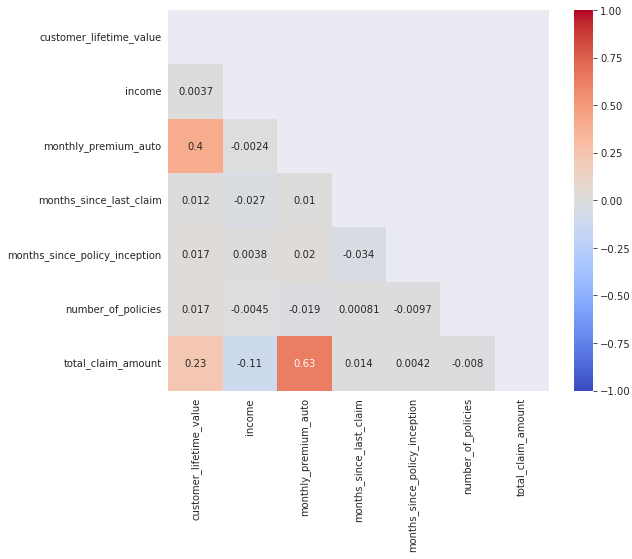

In [7]:
corr = numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("dark"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

## Target variable :

Total claim amount is our target since we would like to know which type of customer effects total claim amount.

In [8]:
#Total Claim Amount is our target. Here we can see more information about it.
print(df['total_claim_amount'].describe())

count    10689.000000
mean       434.227243
std        292.550878
min          0.000000
25%        269.000000
50%        383.000000
75%        547.000000
max       2893.000000
Name: total_claim_amount, dtype: float64


/Users/esrabecker/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


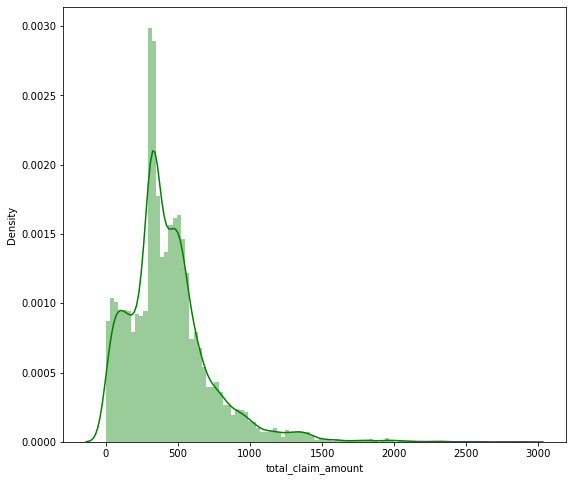

In [9]:
#Distrubition of total claim amount
plt.figure(figsize=(9, 8))
sns.distplot(df['total_claim_amount'], color='g', bins=100, hist_kws={'alpha': 0.4});

### Correlation of total claim amount

Here we can see which values are more correlated to our total claim amount. 

In [10]:
import operator

individual_features_df = []
for i in range(0, len(numerical.columns) - 1): 
    tmpDf = numerical[[numerical.columns[i], 'total_claim_amount']]
    tmpDf = tmpDf[tmpDf[numerical.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['total_claim_amount'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

         income: -0.11122106125728325
number_of_policies: -0.008018893616695447
months_since_policy_inception: 0.004654190716127869
months_since_last_claim: 0.012635300264913973
customer_lifetime_value: 0.23284924398032492
monthly_premium_auto: 0.6301486243480394


In [11]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("There is {} strongly correlated values with total_claim_amount:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with total_claim_amount:
['monthly_premium_auto']


- We found that there's only one value which is strongly correlated with total claim amount which is monthly premium auto. So we can see on the scatterplot the linear points of them as well.

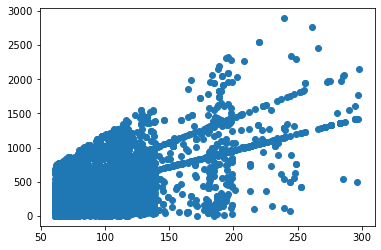

In [12]:
#Show a plot of the response by income
plt.scatter(x=numerical['monthly_premium_auto'], y=numerical['total_claim_amount'])
plt.show()

### Labeling for categorical dataframe

In [13]:
categorical['education'] = categorical['education'].replace(['high school or below', 'college', 'bachelor', 'master', 'doctor'],['1', '2', '3', '4', '5'])
categorical['education']

0        2
1        2
2        3
3        2
4        3
        ..
10684    3
10685    2
10686    3
10687    2
10688    3
Name: education, Length: 10689, dtype: object

In [14]:
categorical['coverage'] = categorical['coverage'].replace(['basic', 'extended', 'premium'],['1', '2', '3'])
categorical['coverage']

0        1
1        1
2        1
3        2
4        3
        ..
10684    3
10685    1
10686    2
10687    3
10688    1
Name: coverage, Length: 10689, dtype: object

In [15]:
categorical['policy_type'] = categorical['policy_type'].replace(['personal auto', 'corporate auto', 'special auto'],['1', '2', '3'])
categorical['policy_type']

0        2
1        1
2        1
3        2
4        1
        ..
10684    1
10685    1
10686    2
10687    1
10688    1
Name: policy_type, Length: 10689, dtype: object

In [16]:
categorical['renew_offer_type'] = categorical['renew_offer_type'].replace(['offer1', 'offer2', 'offer3', 'offer4'],['1', '2', '3', '4'])
categorical['renew_offer_type']

0        3
1        4
2        3
3        2
4        1
        ..
10684    3
10685    2
10686    1
10687    1
10688    4
Name: renew_offer_type, Length: 10689, dtype: object

In [17]:
categorical['month'] = categorical['month'].replace(['jan', 'feb'],['1', '2'])
categorical['month']

0        2
1        1
2        2
3        1
4        1
        ..
10684    1
10685    1
10686    2
10687    2
10688    1
Name: month, Length: 10689, dtype: object

In [18]:
ordinal = categorical[['education', 'month', 'coverage', 'policy_type', 'renew_offer_type']]
ordinal

,education,month,coverage,policy_type,renew_offer_type
0,2,2,1,2,3
1,2,1,1,1,4
2,3,2,1,1,3
3,2,1,2,2,2
4,3,1,3,1,1
...,...,...,...,...,...
10684,3,1,3,1,3
10685,2,1,1,1,2
10686,3,2,2,2,1
10687,2,2,3,1,1


In [19]:
nominal = categorical.drop(columns=['effective_to_date','education', 'month', 'coverage', 'policy_type', 'renew_offer_type'])

In [20]:
nominal


,region,response,employment_status,gender,location_code,marital_status,policy,sales_channel,vehicle_class,vehicle_size
0,central,no,employed,m,suburban,married,corporate l3,agent,four-door car,medsize
1,west region,no,unemployed,f,suburban,single,personal l3,call center,four-door car,medsize
2,east,no,employed,m,suburban,single,personal l3,call center,suv,medsize
3,north west,yes,employed,m,suburban,single,corporate l3,branch,four-door car,medsize
4,north west,no,medical leave,f,suburban,married,personal l2,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...
10684,central,no,unemployed,f,suburban,married,personal l1,web,luxury car,medsize
10685,north west,no,employed,f,urban,married,personal l3,branch,four-door car,medsize
10686,central,no,employed,f,rural,married,corporate l3,web,luxury suv,medsize
10687,west region,no,employed,f,urban,divorced,personal l1,branch,suv,medsize


In [21]:
nominal = pd.get_dummies(nominal,  drop_first=True)


In [22]:
nominal

,region_east,region_north west,region_west region,response_yes,employment_status_employed,employment_status_medical leave,employment_status_retired,employment_status_unemployed,gender_m,location_code_suburban,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,0,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [23]:
categoricals = pd.concat((nominal, ordinal), axis = 1)
categoricals

,region_east,region_north west,region_west region,response_yes,employment_status_employed,employment_status_medical leave,employment_status_retired,employment_status_unemployed,gender_m,location_code_suburban,...,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small,education,month,coverage,policy_type,renew_offer_type
0,0,0,0,0,1,0,0,0,1,1,...,0,0,0,1,0,2,2,1,2,3
1,0,0,1,0,0,0,0,1,0,1,...,0,0,0,1,0,2,1,1,1,4
2,1,0,0,0,1,0,0,0,1,1,...,0,1,0,1,0,3,2,1,1,3
3,0,1,0,1,1,0,0,0,1,1,...,0,0,0,1,0,2,1,2,2,2
4,0,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,3,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,3,1,3,1,3
10685,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,2,1,1,1,2
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,3,2,2,2,1
10687,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,2,2,3,1,1


In [24]:
categoricals['number_of_open_complaints'] = df['number_of_open_complaints']
categoricals

,region_east,region_north west,region_west region,response_yes,employment_status_employed,employment_status_medical leave,employment_status_retired,employment_status_unemployed,gender_m,location_code_suburban,...,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small,education,month,coverage,policy_type,renew_offer_type,number_of_open_complaints
0,0,0,0,0,1,0,0,0,1,1,...,0,0,1,0,2,2,1,2,3,0
1,0,0,1,0,0,0,0,1,0,1,...,0,0,1,0,2,1,1,1,4,0
2,1,0,0,0,1,0,0,0,1,1,...,1,0,1,0,3,2,1,1,3,0
3,0,1,0,1,1,0,0,0,1,1,...,0,0,1,0,2,1,2,2,2,0
4,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,3,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,0,0,1,0,1,...,0,0,1,0,3,1,3,1,3,0
10685,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,2,1,1,1,2,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,3,2,2,2,1,0
10687,0,0,1,0,1,0,0,0,0,0,...,1,0,1,0,2,2,3,1,1,4


In [25]:
df_new = pd.concat((numerical, categoricals), axis = 1)
df_new

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount,region_east,region_north west,region_west region,...,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small,education,month,coverage,policy_type,renew_offer_type,number_of_open_complaints
0,4809,48029,61,7,52,9,292,0,0,0,...,0,0,1,0,2,2,1,2,3,0
1,2228,92260,64,3,26,1,744,0,0,1,...,0,0,1,0,2,1,1,1,4,0
2,14947,22139,100,34,31,2,480,1,0,0,...,1,0,1,0,3,2,1,1,3,0
3,22332,49078,97,10,3,2,484,0,1,0,...,0,0,1,0,2,1,2,2,2,0
4,9025,23675,117,33,31,7,707,0,1,0,...,0,0,1,0,3,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,7,1214,0,0,0,...,0,0,1,0,3,1,3,1,3,0
10685,5259,61146,65,7,68,6,273,0,1,0,...,0,0,1,0,2,1,1,1,2,0
10686,23893,39837,201,11,63,2,381,0,0,0,...,0,0,1,0,3,2,2,2,1,0
10687,11971,64195,158,0,27,6,618,0,0,1,...,1,0,1,0,2,2,3,1,1,4


In [26]:
df_new['education']=df_new['education'].astype(int)
df_new['month']=df_new['month'].astype(int)
df_new['coverage']=df_new['coverage'].astype(int)
df_new['policy_type']=df_new['policy_type'].astype(int)
df_new['renew_offer_type']=df_new['renew_offer_type'].astype(int)

In [27]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   customer_lifetime_value          10689 non-null  int64
 1   income                           10689 non-null  int64
 2   monthly_premium_auto             10689 non-null  int64
 3   months_since_last_claim          10689 non-null  int64
 4   months_since_policy_inception    10689 non-null  int64
 5   number_of_policies               10689 non-null  int64
 6   total_claim_amount               10689 non-null  int64
 7   region_east                      10689 non-null  uint8
 8   region_north west                10689 non-null  uint8
 9   region_west region               10689 non-null  uint8
 10  response_yes                     10689 non-null  uint8
 11  employment_status_employed       10689 non-null  uint8
 12  employment_status_medical leave  10689 non-nul

## X Y Split

In [28]:
X=numerical.drop('total_claim_amount', axis=1) #split the target from data set
y=numerical.total_claim_amount

In [29]:
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies
0,4809,48029,61,7,52,9
1,2228,92260,64,3,26,1
2,14947,22139,100,34,31,2
3,22332,49078,97,10,3,2
4,9025,23675,117,33,31,7
...,...,...,...,...,...,...
10684,15563,61541,253,12,40,7
10685,5259,61146,65,7,68,6
10686,23893,39837,201,11,63,2
10687,11971,64195,158,0,27,6


array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'monthly_premium_auto'}>,
        <AxesSubplot:title={'center':'months_since_last_claim'}>],
       [<AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_policies'}>]],
      dtype=object)

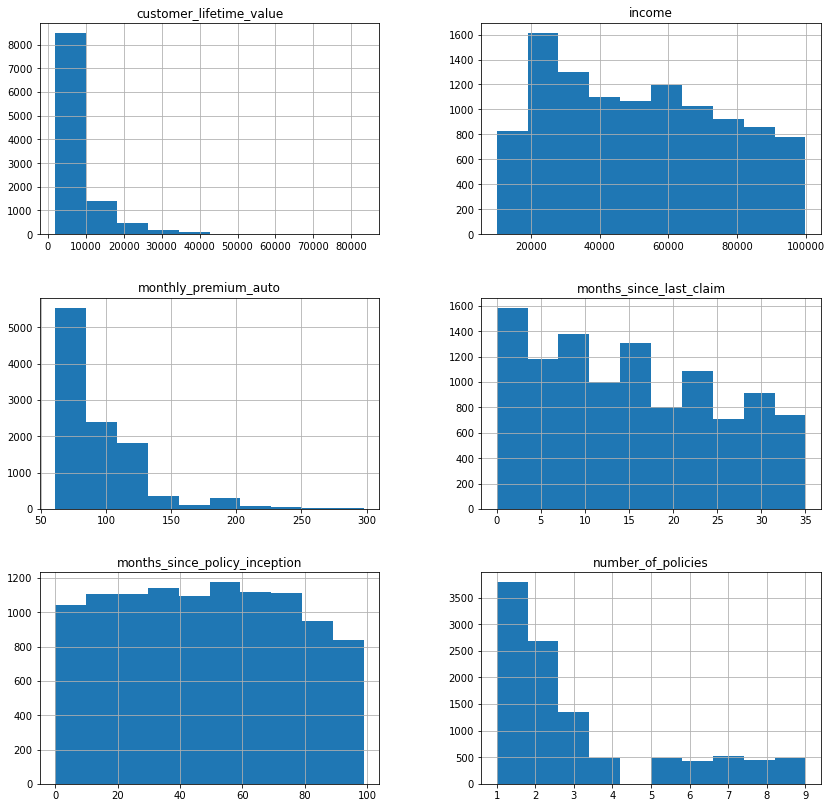

In [30]:
X.hist(figsize=(14,14))

In [31]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [32]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [33]:
X_train.shape

(7482, 6)

In [34]:
X_test_scaled=std_scaler.transform(X_test)

In [35]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.11021627 -1.27291744 -0.67143823  0.77999322  1.36516733 -0.40381143]
 [-0.42794064  0.74729478 -0.72925469 -0.90288055  1.68786198  0.84759702]
 [-0.5223013   0.26592193  0.48489091 -0.90288055  0.50464827 -0.82094758]
 ...
 [-0.81132612 -1.17224873 -0.90270406 -1.00187313 -1.39566466 -0.82094758]
 [ 2.25575772  0.98537142 -0.78707115  0.97797837 -1.61079442 -0.40381143]
 [ 1.18923585  0.68583346 -0.55580532  0.87898579  0.21780858 -0.40381143]]
--------
[[-0.40967729  1.58428551 -0.61362178  0.28503034  1.54444214  2.51614162]
 [-0.7597249  -0.93947257 -0.64253     1.47294124  0.755633   -0.82094758]
 [ 0.57248529 -1.23371005 -0.90270406 -1.496836    0.39708339 -0.40381143]
 ...
 [-0.79857077 -1.05867274 -0.58471355  0.87898579 -1.18053489 -0.82094758]
 [-0.42547654 -0.97370317 -0.81597938  0.58200807 -1.61079442  0.43046087]
 [-0.49881985 -0.95695203  0.71615674  1.76991896 -1.00126009 -0.82094758]]


## Apply Linear Regression for Numerical Data

In [36]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     866.8
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:38:53   Log-Likelihood:                -51168.
No. Observations:                7482   AIC:                         1.024e+05
Df Residuals:                    7475   BIC:                         1.024e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.0597      2.612    165.776      0.0

In [37]:
predictions_test

array([261.36211959, 352.59009828, 298.28557351, ..., 368.29026143,
       316.48312353, 608.79238606])

In [38]:
#display adjusted R-squared
print(model.rsquared_adj)

0.4098094934485419


## X Y Split for the Whole Data Set

In [39]:
X=df_new.drop('total_claim_amount', axis=1) #split the target from data set
y=df_new.total_claim_amount

In [40]:
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,region_east,region_north west,region_west region,response_yes,...,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small,education,month,coverage,policy_type,renew_offer_type,number_of_open_complaints
0,4809,48029,61,7,52,9,0,0,0,0,...,0,0,1,0,2,2,1,2,3,0
1,2228,92260,64,3,26,1,0,0,1,0,...,0,0,1,0,2,1,1,1,4,0
2,14947,22139,100,34,31,2,1,0,0,0,...,1,0,1,0,3,2,1,1,3,0
3,22332,49078,97,10,3,2,0,1,0,1,...,0,0,1,0,2,1,2,2,2,0
4,9025,23675,117,33,31,7,0,1,0,0,...,0,0,1,0,3,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,7,0,0,0,0,...,0,0,1,0,3,1,3,1,3,0
10685,5259,61146,65,7,68,6,0,1,0,0,...,0,0,1,0,2,1,1,1,2,0
10686,23893,39837,201,11,63,2,0,0,0,0,...,0,0,1,0,3,2,2,2,1,0
10687,11971,64195,158,0,27,6,0,0,1,0,...,1,0,1,0,2,2,3,1,1,4


array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>,
        <AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'region_east'}>],
       [<AxesSubplot:title={'center':'region_north west'}>,
        <AxesSubplot:title={'center':'region_west region'}>,
        <AxesSubplot:title={'center':'response_yes'}>,
        <AxesSubplot:title={'center':'employment_status_employed'}>,
        <AxesSubplot:title={'center':'employment_status_medical leave'}>,
        <AxesSubplot:title={'center':'employment_status_retired'}>,
        <AxesSubplot:title={'center':'employment_status_unemployed'}>],
       [<AxesSubplot:title={'center':'gender_m'}>,
        <AxesSubplot:title={'center':'location_code_suburb

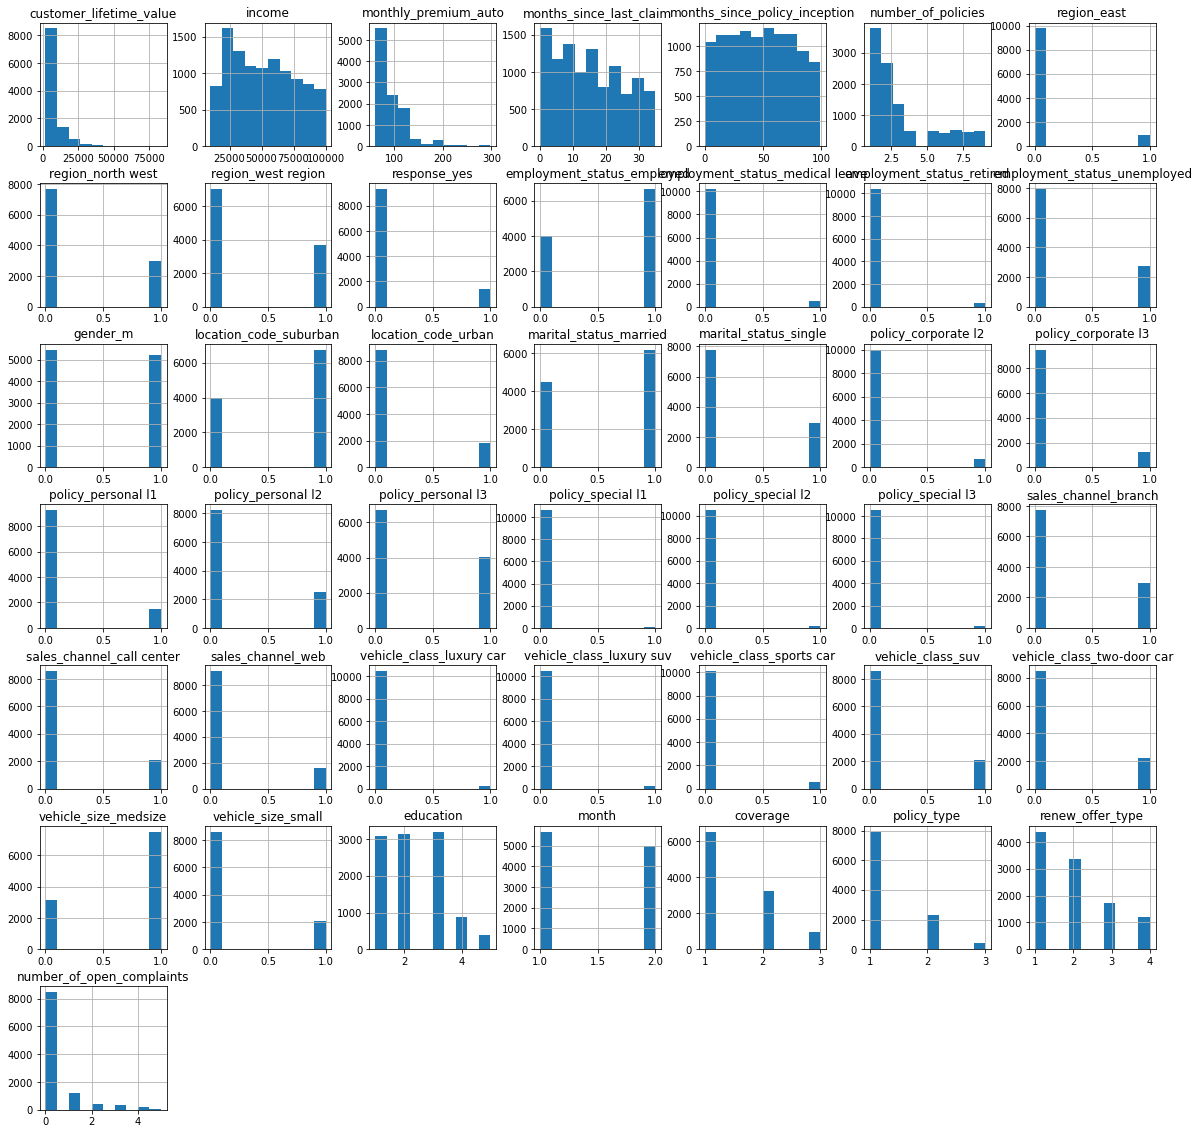

In [41]:
X.hist(figsize=(20,20))

In [42]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [43]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [44]:
X_train.shape

(7482, 43)

In [45]:
X_test_scaled=std_scaler.transform(X_test)

In [46]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.11021627 -1.27291744 -0.67143823 ... -0.55120682  1.00907882
  -0.42500069]
 [-0.42794064  0.74729478 -0.72925469 ... -0.55120682  0.01801453
  -0.42500069]
 [-0.5223013   0.26592193  0.48489091 ... -0.55120682 -0.97304975
  -0.42500069]
 ...
 [-0.81132612 -1.17224873 -0.90270406 ... -0.55120682  1.00907882
  -0.42500069]
 [ 2.25575772  0.98537142 -0.78707115 ...  3.15421046  1.00907882
  -0.42500069]
 [ 1.18923585  0.68583346 -0.55580532 ... -0.55120682  0.01801453
   1.78399907]]
--------
[[-0.40967729  1.58428551 -0.61362178 ... -0.55120682 -0.97304975
  -0.42500069]
 [-0.7597249  -0.93947257 -0.64253    ... -0.55120682 -0.97304975
   0.67949919]
 [ 0.57248529 -1.23371005 -0.90270406 ... -0.55120682 -0.97304975
  -0.42500069]
 ...
 [-0.79857077 -1.05867274 -0.58471355 ...  1.30150182  0.01801453
  -0.42500069]
 [-0.42547654 -0.97370317 -0.81597938 ... -0.55120682  0.01801453
   0.67949919]
 [-0.49881985 -0.95695203  0.71615674 ... -0.55120682  0.01801453
  -0.42500069]]


## Apply Linear Regression for the Whole Data Set

In [47]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     593.3
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:38:56   Log-Likelihood:                -47644.
No. Observations:                7482   AIC:                         9.537e+04
Df Residuals:                    7439   BIC:                         9.567e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.0597      1.635    264.868      0.0

In [48]:
predictions_test

array([462.39651952, 404.8125533 , 134.08036108, ..., 576.93081686,
       -21.83929724, 464.89515878])

In [49]:
#display adjusted R-squared
print(model.rsquared_adj)

0.7688051716648246


### Modeling using Scikit Learn

Model fitting

In [50]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

<b> model parameters  ( b1,b2,b3,b4)

In [51]:
model.coef_

array([-2.47027208e-01, -4.97444473e+00,  1.79024258e+02,  4.56590875e+00,
        1.60075204e-01, -1.24076168e+00,  2.24454665e+00,  2.46302388e-01,
        2.22126774e+00, -8.24915103e+00, -1.13689708e+00,  4.36946548e+00,
        1.91521219e-01,  3.89507616e+01,  7.86986985e+00,  1.84200987e+02,
        8.48969403e+01, -1.64083355e-01,  3.08346032e+01, -2.15396542e+00,
       -8.89690809e-01, -1.34793743e+14, -1.65151909e+14, -1.90593755e+14,
        3.23351055e+13,  5.15435613e+13,  5.05675248e+13,  9.53688940e-01,
       -1.63355094e-01, -1.06663972e+00,  5.02217961e+00, -8.81129986e-01,
       -4.72038998e+00, -6.07716618e+00,  1.50253475e-01, -3.41595620e+00,
        2.11623134e-01, -4.51994016e+00,  7.90486289e-01, -5.60671447e+00,
       -2.12117324e+14,  3.17358180e+00,  1.25815064e+00])

In [52]:
model.intercept_

433.0998884565542

Making prediction

In [53]:
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

In [54]:
y_test

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
3488     404
1667     554
1516     350
10215     27
2931     320
Name: total_claim_amount, Length: 3207, dtype: int64

## Evaluating Model Performance

In [55]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

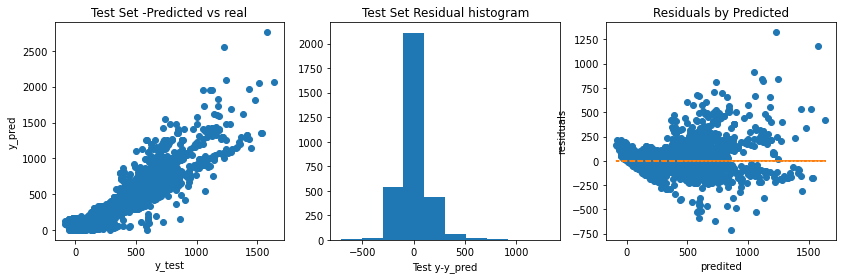

In [56]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

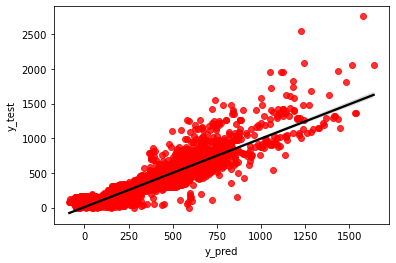

In [57]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

## Error Metrics

In [58]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

19238.025407483114
96.11640957749475


In [59]:
##prediction on the train set
mse(y_train,y_pred_train)

19886.385948037547

In [60]:
import math
rmse = math.sqrt(mse(y_train,y_pred_train))
print("Root Mean Square Error:\n")
print(rmse)

Root Mean Square Error:

141.01909781315985


In [61]:
R2=r2_score(y_test,y_pred)
R2

0.7693697803085692

In [62]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)

In [63]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.7662344342931624

## Feature Importance

In [64]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [65]:
features_importances

,Attribute,Importance
40,policy_type,2.121173e+14
23,policy_personal l3,1.905938e+14
22,policy_personal l2,1.651519e+14
21,policy_personal l1,1.347937e+14
25,policy_special l2,5.154356e+13
26,policy_special l3,5.056752e+13
24,policy_special l1,3.233511e+13
15,location_code_suburban,1.842010e+02
2,monthly_premium_auto,1.790243e+02
16,location_code_urban,8.489694e+01


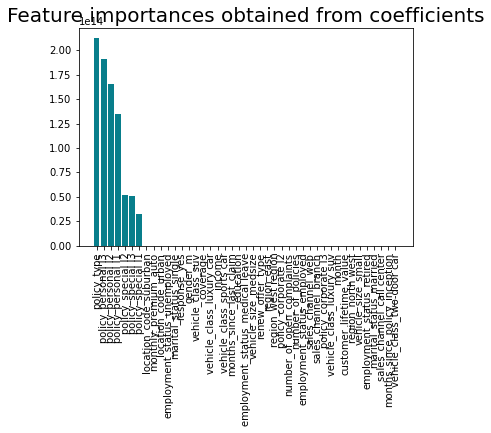

In [66]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

## Removing Outliers

In [67]:
numerical = numerical.drop(columns=['total_claim_amount'])
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies
0,4809,48029,61,7,52,9
1,2228,92260,64,3,26,1
2,14947,22139,100,34,31,2
3,22332,49078,97,10,3,2
4,9025,23675,117,33,31,7
...,...,...,...,...,...,...
10684,15563,61541,253,12,40,7
10685,5259,61146,65,7,68,6
10686,23893,39837,201,11,63,2
10687,11971,64195,158,0,27,6


/Users/esrabecker/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='customer_lifetime_value'>

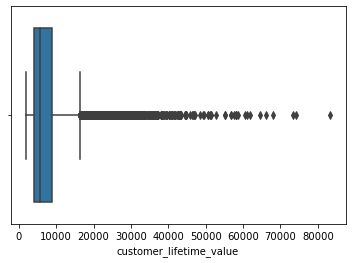

In [68]:
import seaborn as sns
sns.boxplot(numerical['customer_lifetime_value'])

/Users/esrabecker/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income'>

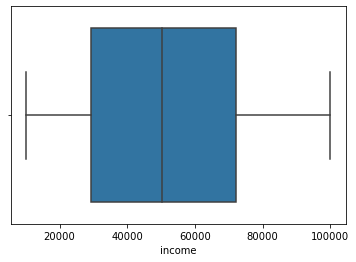

In [69]:
sns.boxplot(numerical['income'])

/Users/esrabecker/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='monthly_premium_auto'>

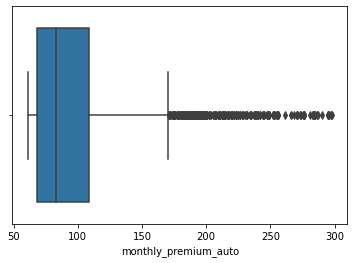

In [70]:
sns.boxplot(numerical['monthly_premium_auto'])

/Users/esrabecker/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='months_since_last_claim'>

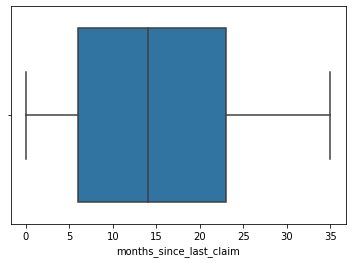

In [71]:
sns.boxplot(numerical['months_since_last_claim'])

/Users/esrabecker/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='months_since_policy_inception'>

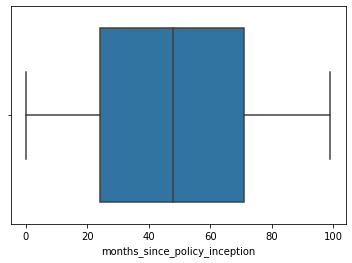

In [72]:
sns.boxplot(numerical['months_since_policy_inception'])

/Users/esrabecker/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_of_policies'>

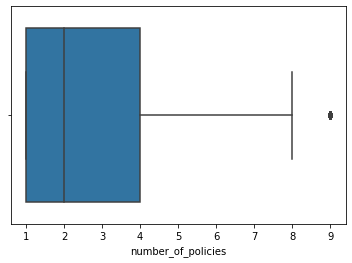

In [73]:
sns.boxplot(numerical['number_of_policies'])

In [74]:
numerical_without = numerical.copy()
numerical_without

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies
0,4809,48029,61,7,52,9
1,2228,92260,64,3,26,1
2,14947,22139,100,34,31,2
3,22332,49078,97,10,3,2
4,9025,23675,117,33,31,7
...,...,...,...,...,...,...
10684,15563,61541,253,12,40,7
10685,5259,61146,65,7,68,6
10686,23893,39837,201,11,63,2
10687,11971,64195,158,0,27,6


In [75]:
#customer_lifetime_value
#monthly_premium_auto
#number_of_policies
for x in ['customer_lifetime_value', 'monthly_premium_auto', 'number_of_policies']:
    q75,q25 = np.percentile(numerical_without.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max_ = q75+(1.5*intr_qr)
    min_ = q25-(1.5*intr_qr)
 
    numerical_without.loc[numerical_without[x] < min_,x] = np.nan
    numerical_without.loc[numerical_without[x] > max_,x] = np.nan

In [76]:
numerical_without.isnull().sum()

customer_lifetime_value          961
income                             0
monthly_premium_auto             507
months_since_last_claim            0
months_since_policy_inception      0
number_of_policies               493
dtype: int64

In [77]:
numerical_without['customer_lifetime_value'].fillna(int(numerical_without['customer_lifetime_value'].mean()), inplace=True)
print(numerical_without)

       customer_lifetime_value  income  monthly_premium_auto  \
0                       4809.0   48029                  61.0   
1                       2228.0   92260                  64.0   
2                      14947.0   22139                 100.0   
3                       6279.0   49078                  97.0   
4                       9025.0   23675                 117.0   
...                        ...     ...                   ...   
10684                  15563.0   61541                   NaN   
10685                   5259.0   61146                  65.0   
10686                   6279.0   39837                   NaN   
10687                  11971.0   64195                 158.0   
10688                   6857.0   68942                 101.0   

       months_since_last_claim  months_since_policy_inception  \
0                            7                             52   
1                            3                             26   
2                           34      

In [78]:
numerical_without['monthly_premium_auto'].fillna(int(numerical_without['monthly_premium_auto'].mean()), inplace=True)
print(numerical_without)

       customer_lifetime_value  income  monthly_premium_auto  \
0                       4809.0   48029                  61.0   
1                       2228.0   92260                  64.0   
2                      14947.0   22139                 100.0   
3                       6279.0   49078                  97.0   
4                       9025.0   23675                 117.0   
...                        ...     ...                   ...   
10684                  15563.0   61541                  87.0   
10685                   5259.0   61146                  65.0   
10686                   6279.0   39837                  87.0   
10687                  11971.0   64195                 158.0   
10688                   6857.0   68942                 101.0   

       months_since_last_claim  months_since_policy_inception  \
0                            7                             52   
1                            3                             26   
2                           34      

In [79]:
numerical_without['number_of_policies'].fillna(int(numerical_without['number_of_policies'].mean()), inplace=True)
print(numerical_without)

       customer_lifetime_value  income  monthly_premium_auto  \
0                       4809.0   48029                  61.0   
1                       2228.0   92260                  64.0   
2                      14947.0   22139                 100.0   
3                       6279.0   49078                  97.0   
4                       9025.0   23675                 117.0   
...                        ...     ...                   ...   
10684                  15563.0   61541                  87.0   
10685                   5259.0   61146                  65.0   
10686                   6279.0   39837                  87.0   
10687                  11971.0   64195                 158.0   
10688                   6857.0   68942                 101.0   

       months_since_last_claim  months_since_policy_inception  \
0                            7                             52   
1                            3                             26   
2                           34      

In [80]:
numerical_without['total_claim_amount'] = df['total_claim_amount']
numerical_without

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount
0,4809.0,48029,61.0,7,52,2.0,292
1,2228.0,92260,64.0,3,26,1.0,744
2,14947.0,22139,100.0,34,31,2.0,480
3,6279.0,49078,97.0,10,3,2.0,484
4,9025.0,23675,117.0,33,31,7.0,707
...,...,...,...,...,...,...,...
10684,15563.0,61541,87.0,12,40,7.0,1214
10685,5259.0,61146,65.0,7,68,6.0,273
10686,6279.0,39837,87.0,11,63,2.0,381
10687,11971.0,64195,158.0,0,27,6.0,618


### XY Split without Outliers

In [81]:
df_without_outliers = pd.concat((numerical_without, categoricals), axis = 1)
df_without_outliers

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount,region_east,region_north west,region_west region,...,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small,education,month,coverage,policy_type,renew_offer_type,number_of_open_complaints
0,4809.0,48029,61.0,7,52,2.0,292,0,0,0,...,0,0,1,0,2,2,1,2,3,0
1,2228.0,92260,64.0,3,26,1.0,744,0,0,1,...,0,0,1,0,2,1,1,1,4,0
2,14947.0,22139,100.0,34,31,2.0,480,1,0,0,...,1,0,1,0,3,2,1,1,3,0
3,6279.0,49078,97.0,10,3,2.0,484,0,1,0,...,0,0,1,0,2,1,2,2,2,0
4,9025.0,23675,117.0,33,31,7.0,707,0,1,0,...,0,0,1,0,3,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563.0,61541,87.0,12,40,7.0,1214,0,0,0,...,0,0,1,0,3,1,3,1,3,0
10685,5259.0,61146,65.0,7,68,6.0,273,0,1,0,...,0,0,1,0,2,1,1,1,2,0
10686,6279.0,39837,87.0,11,63,2.0,381,0,0,0,...,0,0,1,0,3,2,2,2,1,0
10687,11971.0,64195,158.0,0,27,6.0,618,0,0,1,...,1,0,1,0,2,2,3,1,1,4


In [82]:
X=df_without_outliers.drop('total_claim_amount', axis=1) #split the target from data set
Y=df_without_outliers.total_claim_amount

In [83]:
max(Y)

2893

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>,
        <AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_policies'}>],
       [<AxesSubplot:title={'center':'region_east'}>,
        <AxesSubplot:title={'center':'region_north west'}>,
        <AxesSubplot:title={'center':'region_west region'}>,
        <AxesSubplot:title={'center':'response_yes'}>,
        <AxesSubplot:title={'center':'employment_status_employed'}>,
        <AxesSubplot:title={'center':'employment_status_medical leave'}>],
       [<AxesSubplot:title={'center':'employment_status_retired'}>,
        <AxesSubplot:title={'center':'employment_status_unemployed'}>,
        <AxesSubplot:title={'center':'gender_m'}>,
        <AxesSubplot:title={'center':'location_code_suburb

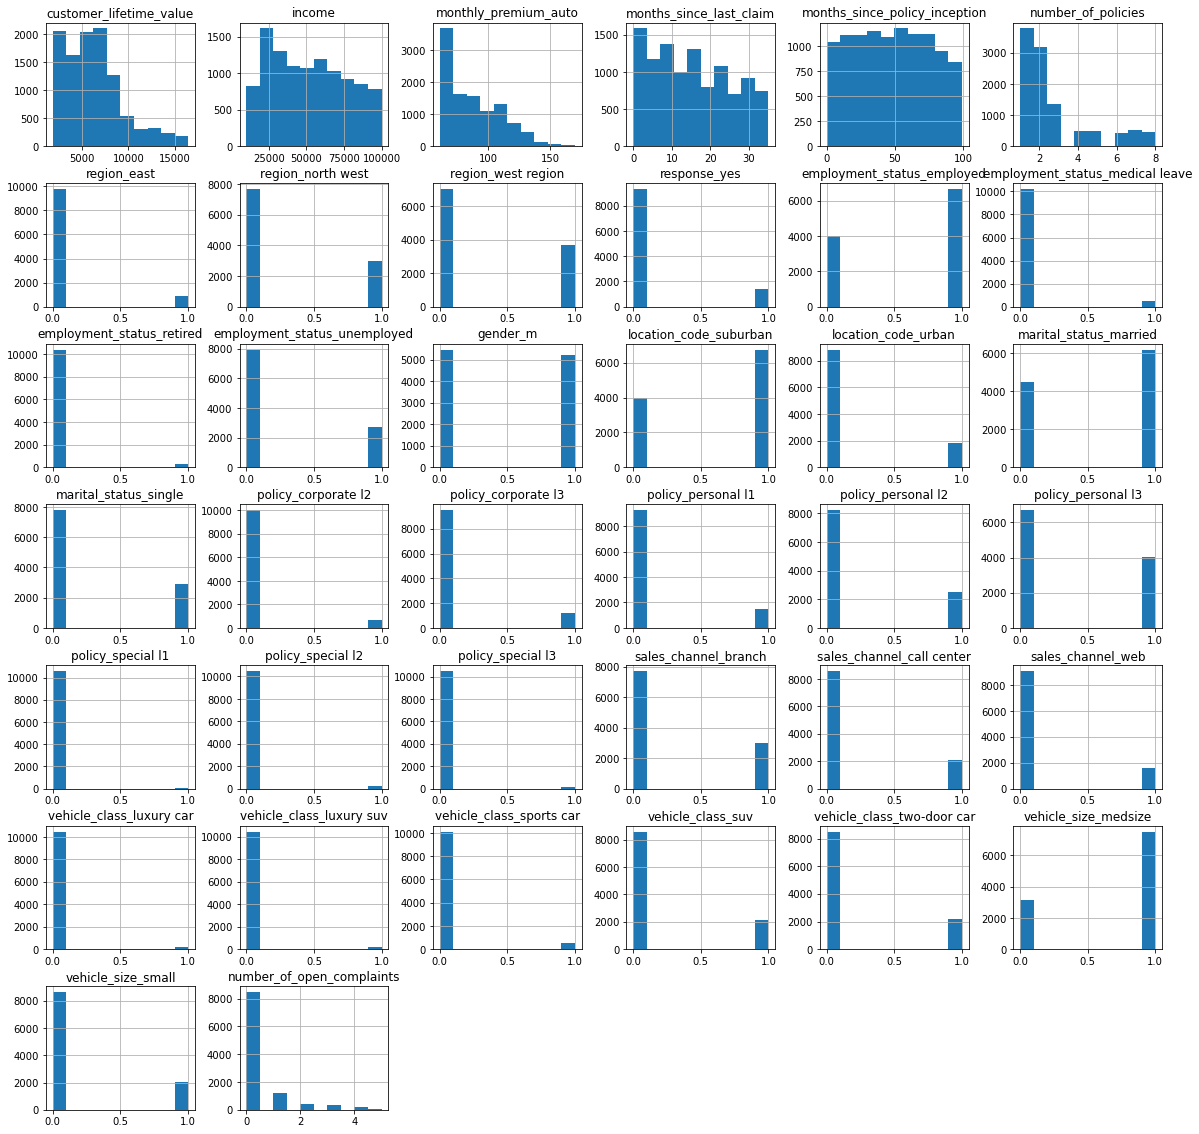

In [84]:
X.hist(figsize=(20,20))

In [85]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

#### Standardize

In [86]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)
X_train.shape

(7482, 43)

In [87]:
X_test_scaled=std_scaler.transform(X_test)
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[ 3.17733268e-01 -1.27291744e+00 -7.86097768e-01 ... -5.51206820e-01
   1.00907882e+00 -4.25000690e-01]
 [-3.90623432e-01  7.47294779e-01 -8.76573924e-01 ... -5.51206820e-01
   1.80145339e-02 -4.25000690e-01]
 [-6.00997617e-01  2.65921934e-01  1.02342536e+00 ... -5.51206820e-01
  -9.73049748e-01 -4.25000690e-01]
 ...
 [-1.24536954e+00 -1.17224873e+00 -1.14800239e+00 ... -5.51206820e-01
   1.00907882e+00 -4.25000690e-01]
 [-2.83691767e-03  9.85371422e-01 -9.67050081e-01 ...  3.15421046e+00
   1.00907882e+00 -4.25000690e-01]
 [ 3.21482169e+00  6.85833457e-01 -6.05145455e-01 ... -5.51206820e-01
   1.80145339e-02  1.78399907e+00]]
--------
[[-0.34990585  1.58428551 -0.69562161 ... -0.55120682 -0.97304975
  -0.42500069]
 [-1.13032621 -0.93947257 -0.74085969 ... -0.55120682 -0.97304975
   0.67949919]
 [ 1.83979534 -1.23371005 -1.14800239 ... -0.55120682 -0.97304975
  -0.42500069]
 ...
 [-1.21693186 -1.05867274 -0.65038353 ...  1.30150182  0.01801453
  -0.42500069]
 [-0.38512979 -0.97370317 

### Apply Linear Regression Without Outliers

In [88]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train
model.coef_

array([ 4.44120282e+00, -5.07545635e+00,  3.40097351e+01,  6.24267154e+00,
        1.43595210e+00, -9.14160926e-01,  3.31983775e+00,  6.49085368e-01,
        2.73097224e+00, -7.32140974e+00, -1.50350342e+00,  3.52100878e+00,
       -1.84856096e+00,  3.56404201e+01,  7.65519973e+00,  1.86867151e+02,
        8.52063576e+01, -6.88502312e-03,  3.12329354e+01, -2.94402637e+00,
       -1.07741057e+00,  1.11737631e+14,  1.36903114e+14,  1.57993200e+14,
       -2.68042716e+13, -4.27271721e+13, -4.19180840e+13,  3.98310373e-01,
        6.04775865e-01, -5.32992204e-01,  9.16351024e+01,  8.85071685e+01,
        3.03123387e+01,  5.28579160e+01, -8.33699072e-02, -1.59636188e+00,
        1.18918295e+00, -4.49413369e+00,  1.22936438e+00,  5.43599269e+01,
        1.75835220e+14,  2.81152418e+00,  2.51192237e+00])

In [89]:
model.intercept_

433.02646501967143

Making Prediction

In [90]:
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

In [91]:
y_pred

array([444.3825582 , 393.23510116, 144.8356832 , ..., 544.68217285,
       -15.86912264, 454.85645939])

In [92]:
y_test

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
3488     404
1667     554
1516     350
10215     27
2931     320
Name: total_claim_amount, Length: 3207, dtype: int64

## Evaluating Model Performance

In [93]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

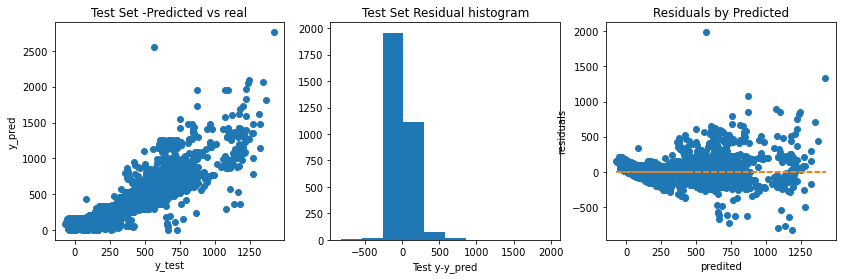

In [94]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

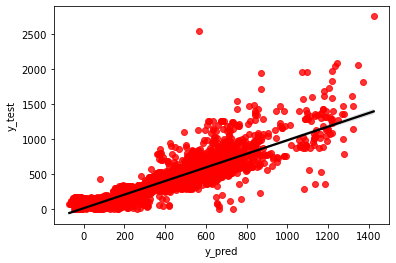

In [95]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

### Error Metrics Without Outliers

In [96]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

22920.220629137963
101.5526389406554


In [97]:
mse(y_train,y_pred_train)

23454.215052525284

In [98]:
import math
rmse = math.sqrt(mse(y_train,y_pred_train))
print("Root Mean Square Error:\n")
print(rmse)

Root Mean Square Error:

153.1476903270999


In [99]:
R2=r2_score(y_test,y_pred)
R2

0.7252267107923668

In [100]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.7214912534936224

# Fit the Lasso Model

In [101]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
model=Lasso(alpha=0.05)

model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Lasso: Train -> 0.7288299037783523, Test -> 0.7254634295290252


# Fit the Ridge Model

In [102]:
model=Ridge(alpha=10000)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Ridge: Train -> 0.3086508939010526, Test -> 0.32436798847252335


# Feature Selection

## RFE  Method

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE  ## recursive feature elemination technique

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

#X_train.isna().sum()
nulls = pd.DataFrame(X_train.isna().sum()).reset_index()
#nulls.head()
nulls.columns = ['Column','nas']
#nulls.head()
#nulls[nulls['nas'] > 0].head()
cols_to_drop = nulls[nulls['nas'] > 0]['Column'] # Too drastic, but made on pourpose for quick filtering (don't do this in production!!)

X_train.drop(columns=cols_to_drop, axis=1, inplace = True)
X_test.drop(columns=cols_to_drop, axis=1, inplace = True)

#display(X_train)

lm = LinearRegression()

selector = RFE(lm, n_features_to_select= 8, step = 1, verbose = 1) # Step is how many features to add or drop everytime
selector.fit(X_train, y_train)

kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features].columns)

X_train = selector.transform(X_train)
X_test  = selector.transform(X_test)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final selected features: ")
display(X_train)

Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 fe

,employment_status_unemployed,location_code_suburban,location_code_urban,marital_status_single,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
8546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8548,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8549,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## P-Value Future Selection

In [104]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.datasets import load_boston

In [105]:
df_new

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount,region_east,region_north west,region_west region,response_yes,employment_status_employed,employment_status_medical leave,employment_status_retired,employment_status_unemployed,gender_m,location_code_suburban,location_code_urban,marital_status_married,marital_status_single,policy_corporate l2,policy_corporate l3,policy_personal l1,policy_personal l2,policy_personal l3,policy_special l1,policy_special l2,policy_special l3,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small,education,month,coverage,policy_type,renew_offer_type,number_of_open_complaints
0,4809,48029,61,7,52,9,292,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,2,1,2,3,0
1,2228,92260,64,3,26,1,744,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,2,1,1,1,4,0
2,14947,22139,100,34,31,2,480,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,3,2,1,1,3,0
3,22332,49078,97,10,3,2,484,0,1,0,1,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,2,1,2,2,2,0
4,9025,23675,117,33,31,7,707,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,3,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,7,1214,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,3,1,3,1,3,0
10685,5259,61146,65,7,68,6,273,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,2,1,1,1,2,0
10686,23893,39837,201,11,63,2,381,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,3,2,2,2,1,0
10687,11971,64195,158,0,27,6,618,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,2,2,3,1,1,4


In [106]:
x = df_new.drop(['total_claim_amount'], axis = 1) 
y = df_new['total_claim_amount']
X = pd.DataFrame(x, columns = x.columns)

X_added_constant = sm.add_constant(X)
X_added_constant

,const,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,region_east,region_north west,region_west region,response_yes,employment_status_employed,employment_status_medical leave,employment_status_retired,employment_status_unemployed,gender_m,location_code_suburban,location_code_urban,marital_status_married,marital_status_single,policy_corporate l2,policy_corporate l3,policy_personal l1,policy_personal l2,policy_personal l3,policy_special l1,policy_special l2,policy_special l3,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small,education,month,coverage,policy_type,renew_offer_type,number_of_open_complaints
0,1.0,4809,48029,61,7,52,9,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,2,1,2,3,0
1,1.0,2228,92260,64,3,26,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,2,1,1,1,4,0
2,1.0,14947,22139,100,34,31,2,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,3,2,1,1,3,0
3,1.0,22332,49078,97,10,3,2,0,1,0,1,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,2,1,2,2,2,0
4,1.0,9025,23675,117,33,31,7,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,3,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1.0,15563,61541,253,12,40,7,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,3,1,3,1,3,0
10685,1.0,5259,61146,65,7,68,6,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,2,1,1,1,2,0
10686,1.0,23893,39837,201,11,63,2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,3,2,2,2,1,0
10687,1.0,11971,64195,158,0,27,6,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,2,2,3,1,1,4


In [107]:
# we need to add this constant value of 1 for the intercepts
import statsmodels.api as sm
model = sm.OLS(y,X_added_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_claim_amount   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     850.5
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:39:03   Log-Likelihood:                -68002.
No. Observations:               10689   AIC:                         1.361e+05
Df Residuals:                   10646   BIC:                         1.364e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            -224.1108     10.320    -21.716      0.000    -244.340    -203.881
customer_lifetime_value            -0.0001      0.000     -0.497      0.619      -0.001       0.000
income                             -0.0002   6.32e-05     -2.787      0.005      -0.000   -5.23e-05
monthly_premium_auto                5.2323      0.116     45.212      0.000       5.005       5.459
months_since_last_claim             0.3590      0.135      2.655      0.008       0.094       0.624
months_since_policy_inception      -0.0166      0.049     -0.339      0.735      -0.113       0.080
number_of_policies                  0.6142      0.571      1.076      0.282      -0.504       1.733
region_east                         5.9825      5.274      1.134      0.257      -4.355      16.320
region_north west                  -1.7676      3.606     -0.490      0.624      -8.837       5.302
region_west region                  4.0097      3.442      1.165      0.244      -2.737      10.756
response_yes                      -21.7416      4.330     -5.021      0.000     -30.229     -13.254
employment_status_employed         -9.2132      7.050     -1.307      0.191     -23.032       4.606
employment_status_medical leave    12.8600      9.009      1.427      0.153      -4.800      30.520
employment_status_retired          -9.9208     10.565     -0.939      0.348     -30.630      10.789
employment_status_unemployed       78.8361      7.462     10.566      0.000      64.210      93.462
gender_m                           15.8253      2.746      5.763      0.000      10.443      21.208
location_code_suburban            380.7125      3.940     96.633      0.000     372.990     388.435
location_code_urban               222.4269      4.488     49.563      0.000     213.630     231.224
marital_status_married             -3.8336      4.033     -0.951      0.342     -11.738       4.071
marital_status_single              66.9023      4.647     14.398      0.000      57.794      76.011
policy_corporate l2                -6.2148      8.667     -0.717      0.473     -23.204      10.775
policy_corporate l3                -0.1531      7.918     -0.019      0.985     -15.673      15.367
policy_personal l1                -50.9972      7.181     -7.101      0.000     -65.074     -36.920
policy_personal l2                -56.8616      6.852     -8.299      0.000     -70.293     -43.431
policy_personal l3                -57.1626      6.662     -8.580      0.000     -70.222     -44.103
policy_special l1                 109.3718     16.872      6.482      0.000      76.300     142.444
policy_special l2                  58.4675     12.632      4.629      0.000      33.707      83.228
policy_special l3                  58.8981     12.988      4.535      0.000      33

In [108]:
significant_features=X_added_constant[model.params[list(np.where(model.pvalues < 0.05)[0])].iloc[0:].index.tolist()]
significant_features

,const,income,monthly_premium_auto,months_since_last_claim,response_yes,employment_status_unemployed,gender_m,location_code_suburban,location_code_urban,marital_status_single,policy_personal l1,policy_personal l2,policy_personal l3,policy_special l1,policy_special l2,policy_special l3,vehicle_class_sports car,vehicle_class_suv,education,coverage,policy_type
0,1.0,48029,61,7,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,1,2
1,1.0,92260,64,3,0,1,0,1,0,1,0,0,1,0,0,0,0,0,2,1,1
2,1.0,22139,100,34,0,0,1,1,0,1,0,0,1,0,0,0,0,1,3,1,1
3,1.0,49078,97,10,1,0,1,1,0,1,0,0,0,0,0,0,0,0,2,2,2
4,1.0,23675,117,33,0,0,0,1,0,0,0,1,0,0,0,0,0,0,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1.0,61541,253,12,0,1,0,1,0,0,1,0,0,0,0,0,0,0,3,3,1
10685,1.0,61146,65,7,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2,1,1
10686,1.0,39837,201,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,2
10687,1.0,64195,158,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,2,3,1


# Linear Regression Model with the Selected Features

In [109]:
X= significant_features
X

,const,income,monthly_premium_auto,months_since_last_claim,response_yes,employment_status_unemployed,gender_m,location_code_suburban,location_code_urban,marital_status_single,policy_personal l1,policy_personal l2,policy_personal l3,policy_special l1,policy_special l2,policy_special l3,vehicle_class_sports car,vehicle_class_suv,education,coverage,policy_type
0,1.0,48029,61,7,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,1,2
1,1.0,92260,64,3,0,1,0,1,0,1,0,0,1,0,0,0,0,0,2,1,1
2,1.0,22139,100,34,0,0,1,1,0,1,0,0,1,0,0,0,0,1,3,1,1
3,1.0,49078,97,10,1,0,1,1,0,1,0,0,0,0,0,0,0,0,2,2,2
4,1.0,23675,117,33,0,0,0,1,0,0,0,1,0,0,0,0,0,0,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1.0,61541,253,12,0,1,0,1,0,0,1,0,0,0,0,0,0,0,3,3,1
10685,1.0,61146,65,7,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2,1,1
10686,1.0,39837,201,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,2
10687,1.0,64195,158,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,2,3,1


In [110]:
y= df['total_claim_amount']
y

0         292
1         744
2         480
3         484
4         707
         ... 
10684    1214
10685     273
10686     381
10687     618
10688    1021
Name: total_claim_amount, Length: 10689, dtype: int64

In [111]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [112]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [113]:
X_train.shape

(7482, 21)

In [114]:
X_test_scaled=std_scaler.transform(X_test)

In [115]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[ 0.         -1.27291744 -0.67143823 ... -0.25803541 -0.73075717
  -0.55120682]
 [ 0.          0.74729478 -0.72925469 ...  0.67463171 -0.73075717
  -0.55120682]
 [ 0.          0.26592193  0.48489091 ... -1.19070252 -0.73075717
  -0.55120682]
 ...
 [ 0.         -1.17224873 -0.90270406 ...  0.67463171 -0.73075717
  -0.55120682]
 [ 0.          0.98537142 -0.78707115 ...  0.67463171 -0.73075717
   3.15421046]
 [ 0.          0.68583346 -0.55580532 ... -0.25803541 -0.73075717
  -0.55120682]]
--------
[[ 0.          1.58428551 -0.61362178 ... -0.25803541 -0.73075717
  -0.55120682]
 [ 0.         -0.93947257 -0.64253    ... -0.25803541 -0.73075717
  -0.55120682]
 [ 0.         -1.23371005 -0.90270406 ...  1.60729882 -0.73075717
  -0.55120682]
 ...
 [ 0.         -1.05867274 -0.58471355 ... -0.25803541 -0.73075717
   1.30150182]
 [ 0.         -0.97370317 -0.81597938 ... -0.25803541 -0.73075717
  -0.55120682]
 [ 0.         -0.95695203  0.71615674 ... -0.25803541  2.30002174
  -0.55120682]]


In [116]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     1309.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:39:03   Log-Likelihood:                -47658.
No. Observations:                7482   AIC:                         9.536e+04
Df Residuals:                    7462   BIC:                         9.550e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.0597      1.636    264.769      0.0

In [117]:
predictions_test

array([470.05939168, 411.95542654, 139.05270765, ..., 580.62864653,
       -22.46989411, 461.11456116])

In [118]:
#display adjusted R-squared
print(model.rsquared_adj)

0.7686320508467702


# Lasso Model with New Features

In [119]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
model=Lasso(alpha=0.05)

model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Lasso: Train -> 0.7692111620282105, Test -> 0.7699527133498234


# Ridge Model with the New Features

In [120]:
model=Ridge(alpha=10)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Ridge: Train -> 0.7691655038168899, Test -> 0.7698971287638713
